# Data Analysis for Telco Churn Dataset by IBM

In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
#Loading the dataset
df = pd.read_excel("../data/Telco_customer_churn.xlsx")
df

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


In [45]:
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

## Data Description
### 7043 observations with 33 variables

CustomerID: A unique ID that identifies each customer.

Count: A value used in reporting/dashboarding to sum up the number of customers in a filtered set.

Country: The country of the customer’s primary residence.

State: The state of the customer’s primary residence.

City: The city of the customer’s primary residence.

Zip Code: The zip code of the customer’s primary residence.

Lat Long: The combined latitude and longitude of the customer’s primary residence.

Latitude: The latitude of the customer’s primary residence.

Longitude: The longitude of the customer’s primary residence.

Gender: The customer’s gender: Male, Female

Senior Citizen: Indicates if the customer is 65 or older: Yes, No

Partner: Indicate if the customer has a partner: Yes, No

Dependents: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.

Tenure Months: Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.

Phone Service: Indicates if the customer subscribes to home phone service with the company: Yes, No

Multiple Lines: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No

Internet Service: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.

Online Security: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No

Online Backup: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No

Device Protection: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No

Tech Support: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No

Streaming TV: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.

Streaming Movies: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.

Contract: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.

Paperless Billing: Indicates if the customer has chosen paperless billing: Yes, No

Payment Method: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check

Monthly Charge: Indicates the customer’s current total monthly charge for all their services from the company.

Total Charges: Indicates the customer’s total charges, calculated to the end of the quarter specified above.

Churn Label: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.

Churn Value: 1 = the customer left the company this quarter. 0 = the customer remained with the company. Directly related to Churn Label.

Churn Score: A value from 0-100 that is calculated using the predictive tool IBM SPSS Modeler. The model incorporates multiple factors known to cause churn. The higher the score, the more likely the customer will churn.

CLTV: Customer Lifetime Value. A predicted CLTV is calculated using corporate formulas and existing data. The higher the value, the more valuable the customer. High value customers should be monitored for churn.

Churn Reason: A customer’s specific reason for leaving the company. Directly related to Churn Category.

## Feature Partioning

Lets partition the data for better understanding

1. Location 

Features : 'Country', 'State', 'City', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude'

2. User Information

Features : 'Gender', 'Senior Citizen', 'Partner', 'Dependents'

3. Service 

Features : 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies'

4. Contract 

Features : , 'Tenure Months', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges', 'Total Charges',

5. Churn :

Note : This shouldn't be used a Feature. They will be only for Analysis purpose and bettering the customer service.

Features : 'Churn Label', 'Churn Score', 'CLTV', 'Churn Reason'

### Classification Label - Churn Value

Note that Churn Value is either 1 (churned) or 0 (not churned) so this is the case of **Binary Classification**.

# Data Cleaning

In [46]:
# Data Cleaning 

#checking Non Unique rows
print(len(df['CustomerID'].unique()) == len(df))
#since all rows are unique we can start dropping irrelevant columns


True


In [47]:
# Data Cleaning of Location based Features

print(df['Count'].unique()) ## will be dropped as every row is 1 
print(df['Country'].unique()) ## will be dropped as data is of USA
print(df['State'].unique()) # will be dropped as data is of California
print(df['City'].unique()) # cannot be dropped as the data is taken from multiple cities and service can differ from city to city and in fact zip code to zip code 
print(df["Lat Long"]) # since Latitude and Longitude is already there as a separate row, we can drop this (assuming there is no discrepency in writing the data))

[1]
['United States']
['California']
['Los Angeles' 'Beverly Hills' 'Huntington Park' ... 'Standish' 'Tulelake'
 'Olympic Valley']
0       33.964131, -118.272783
1        34.059281, -118.30742
2       34.048013, -118.293953
3       34.062125, -118.315709
4       34.039224, -118.266293
                 ...          
7038    34.341737, -116.539416
7039    34.667815, -117.536183
7040    34.559882, -115.637164
7041       34.1678, -116.86433
7042    34.424926, -117.184503
Name: Lat Long, Length: 7043, dtype: object


In [50]:


# dropping the relevant columns
drop_loc = ["Count", "Country", "State", "Lat Long"]
df = df.drop(drop_loc , axis = 1, errors = "ignore")  ## We can run this multiple times without key error 


### Note - One far fetched assumption I can take is that we drop Latitude and Longitude as Internet providers provides service to the whole zone (generally).

df = df.drop(["Latitude", "Longitude"], axis = 1, errors = "ignore")

In [56]:
# Data Cleaning of User based Features

print(df['Gender'].unique()) 
print(df['Senior Citizen'].unique())
print(df['Partner'].unique())
print(df['Dependents'].unique())

#since all the columns are non unique we will handle it in analysis section

['Male' 'Female']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']


In [63]:
# Data Cleaning of Service Features
service_features = ['Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies']

for feats in service_features:
    print(feats,": ",df[feats].unique())

# since every service is non unique, we cannot drop the columns at this stage

Phone Service :  ['Yes' 'No']
Multiple Lines :  ['No' 'Yes' 'No phone service']
Internet Service :  ['DSL' 'Fiber optic' 'No']
Online Security :  ['Yes' 'No' 'No internet service']
Online Backup :  ['Yes' 'No' 'No internet service']
Device Protection :  ['No' 'Yes' 'No internet service']
Tech Support :  ['No' 'Yes' 'No internet service']
Streaming TV :  ['No' 'Yes' 'No internet service']
Streaming Movies :  ['No' 'Yes' 'No internet service']


In [62]:
contract_features = ['Tenure Months', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges', 'Total Charges']
for feats in contract_features:
    print(feats,": ",df[feats].unique())

# since every feature is non unique, we cannot drop the columns at this stage

Tenure Months :  [ 2  8 28 49 10  1 47 17  5 34 11 15 18  9  7 12 25 68 55 37  3 27 20  4
 58 53 13  6 19 59 16 52 24 32 38 54 43 63 21 69 22 61 60 48 40 23 39 35
 56 65 33 30 45 46 62 70 50 44 71 26 14 41 66 64 29 42 67 51 31 57 36 72
  0]
Contract :  ['Month-to-month' 'Two year' 'One year']
Paperless Billing :  ['Yes' 'No']
Payment Method :  ['Mailed check' 'Electronic check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Monthly Charges :  [ 53.85  70.7   99.65 ... 108.35  63.1   78.7 ]
Total Charges :  [108.15 151.65 820.5 ... 7362.9 346.45 6844.5]


In [78]:
# we can drop the customer id since we will not be mintoring individual customers in this analysis

df = df.drop(['CustomerID'], axis = 1, errors='ignore')

# Data Anlaysis

In [86]:
print(df.count())
## only churn reason contains null value


City                 7043
Zip Code             7043
Gender               7043
Senior Citizen       7043
Partner              7043
Dependents           7043
Tenure Months        7043
Phone Service        7043
Multiple Lines       7043
Internet Service     7043
Online Security      7043
Online Backup        7043
Device Protection    7043
Tech Support         7043
Streaming TV         7043
Streaming Movies     7043
Contract             7043
Paperless Billing    7043
Payment Method       7043
Monthly Charges      7043
Total Charges        7043
Churn Label          7043
Churn Value          7043
Churn Score          7043
CLTV                 7043
Churn Reason         1869
dtype: int64


In [88]:
df['Churn Label'].value_counts()

Churn Label
No     5174
Yes    1869
Name: count, dtype: int64

Out of 7043 data entries, only ~27 % people churned. We can do the analysis of only those people since we can guess a cause for churning.

In [91]:
df_churned = df[df['Churn Label'] == 'Yes']

In [98]:
df_churned["Churn Reason"].value_counts()
#there are no null values, which means there is a reason for every churn except where reason written is unknown

Churn Reason
Attitude of support person                   192
Competitor offered higher download speeds    189
Competitor offered more data                 162
Don't know                                   154
Competitor made better offer                 140
Attitude of service provider                 135
Competitor had better devices                130
Network reliability                          103
Product dissatisfaction                      102
Price too high                                98
Service dissatisfaction                       89
Lack of self-service on Website               88
Extra data charges                            57
Moved                                         53
Lack of affordable download/upload speed      44
Limited range of services                     44
Long distance charges                         44
Poor expertise of phone support               20
Poor expertise of online support              19
Deceased                                       6
Name: c

Just by looking the numbers above we can see that there are mainly 3-4 reasons for churning:
1. **Competitor Advantage**
- Competitor offered higher download speeds
- Competitor offered more data
- Competitor made better offer
- Competitor had better devices

2. **Customer Service & Support**
- Attitude of support person
- Attitude of service provider
- Poor expertise of phone support
- Poor expertise of online support
- Lack of self-service on Website

3. **Product/Service Dissatisfaction**
- Network reliability
- Product dissatisfaction
- Service dissatisfaction
- Extra data charges
- Long distance charges
- Limited range of services
- Lack of affordable download/upload speed

4. **Price-Related**
- Price too high
- Extra data charges

5. **External Factors**
- Moved
- Don't know
- Deceased

We can interpret later in the notebook.

In [139]:
df_churned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1869 entries, 0 to 1868
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               1869 non-null   object 
 1   Zip Code           1869 non-null   int64  
 2   Gender             1869 non-null   object 
 3   Senior Citizen     1869 non-null   object 
 4   Partner            1869 non-null   object 
 5   Dependents         1869 non-null   object 
 6   Tenure Months      1869 non-null   int64  
 7   Phone Service      1869 non-null   object 
 8   Multiple Lines     1869 non-null   object 
 9   Internet Service   1869 non-null   object 
 10  Online Security    1869 non-null   object 
 11  Online Backup      1869 non-null   object 
 12  Device Protection  1869 non-null   object 
 13  Tech Support       1869 non-null   object 
 14  Streaming TV       1869 non-null   object 
 15  Streaming Movies   1869 non-null   object 
 16  Contract           1869 non-n

In [135]:
# Location wise analysis

print(df_churned['City'].value_counts()[:10])

City
Los Angeles      90
San Diego        50
San Francisco    31
San Jose         29
Sacramento       26
Fresno           16
Long Beach       15
Glendale         13
Oakland          13
Stockton         12
Name: count, dtype: int64


I will go ahead and create a graph describing the reasons of churning in top 10 cities

/tmp/ipykernel_5596/4010011700.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_churned['Churn Category'] = df_churned['Churn Reason'].map(reason_mapping)


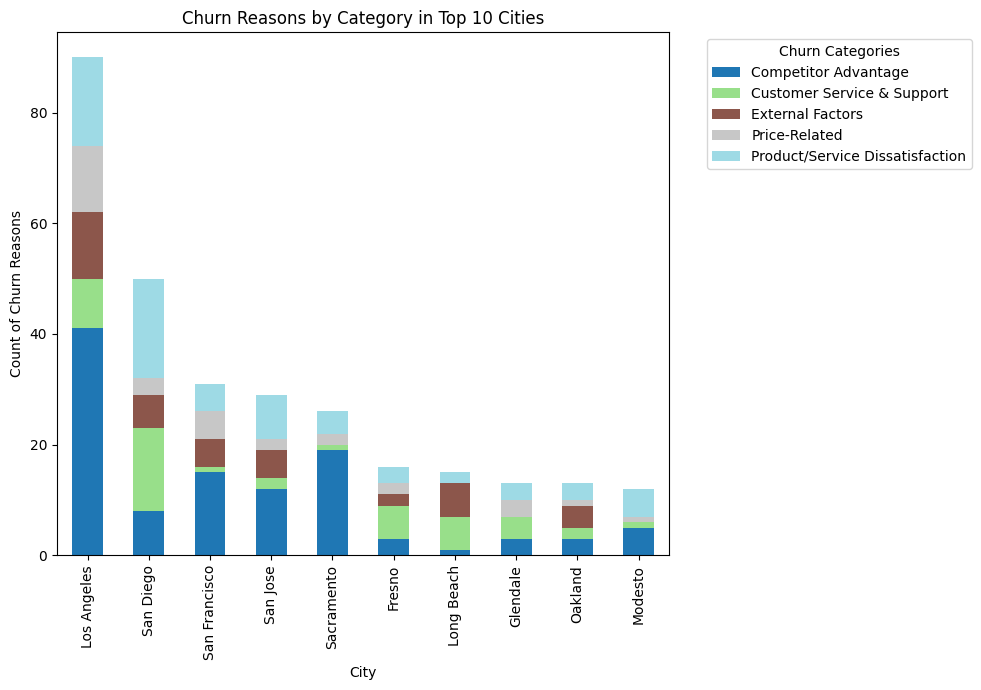

In [146]:
reason_mapping = {
    'Competitor offered higher download speeds': 'Competitor Advantage',
    'Competitor offered more data': 'Competitor Advantage',
    'Competitor made better offer': 'Competitor Advantage',
    'Competitor had better devices': 'Competitor Advantage',
    'Attitude of support person': 'Customer Service & Support',
    'Attitude of service provider': 'Customer Service & Support',
    'Poor expertise of phone support': 'Customer Service & Support',
    'Poor expertise of online support': 'Customer Service & Support',
    'Lack of self-service on Website': 'Customer Service & Support',
    'Network reliability': 'Product/Service Dissatisfaction',
    'Product dissatisfaction': 'Product/Service Dissatisfaction',
    'Service dissatisfaction': 'Product/Service Dissatisfaction',
    'Extra data charges': 'Price-Related',
    'Price too high': 'Price-Related',
    'Limited range of services': 'Product/Service Dissatisfaction',
    'Lack of affordable download/upload speed': 'Product/Service Dissatisfaction',
    'Long distance charges': 'Product/Service Dissatisfaction',
    'Moved': 'External Factors',
    'Don\'t know': 'External Factors',
    'Deceased': 'External Factors'
}

df_churned['Churn Category'] = df_churned['Churn Reason'].map(reason_mapping)

city_churn_counts = df_churned.groupby(['City', 'Churn Category']).size().unstack(fill_value=0)
top_10_cities = city_churn_counts.sum(axis=1).nlargest(10).index
top_10_city_data = city_churn_counts.loc[top_10_cities]

top_10_city_data.plot(kind='bar', stacked=True, figsize=(10, 7), colormap='tab20')
plt.title('Churn Reasons by Category in Top 10 Cities')
plt.xlabel('City')
plt.ylabel('Count of Churn Reasons')
plt.legend(title='Churn Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


1. From the bar chart above we can clearly see that People in Los Angeles, San Francisco, San Jose, and Sacramento  got a better service from the competitor. They can work upon that. Secondly, there are people who likes to try out other companies and a huge population may lie in this category.
2. The other major reason is Customer Service which can be seen in San Diego. The company should look into the Employees working in San Diego, Fresno and Long Beach.
3. Product Dissatisfaction is another reason. Maybe they can improve upon hardware like Modems and upgrade the quality of service.
4. Price related issues are there but in minute number.
5. External Factors Include Moved, deceased and unknown. Deceased quantity is very less and we cannot do anything about people moving.

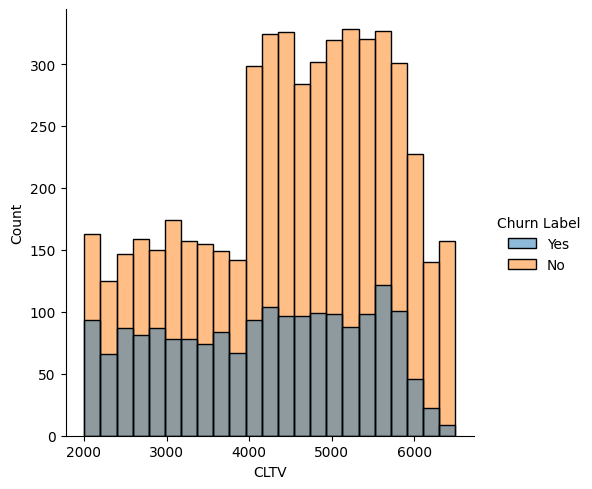

In [241]:
sns.displot(df,x= 'CLTV', hue='Churn Label')


In the CLTV graph we can see that it is mostly distributed well enough. We want that people with high CLTV have lower churn rates, which means that company is not doing well enough to stop people from churning.

We have analyzed the reasons behind Churning at Different locations giving the company enough information to work upon that. Now lets analyse other features and their relation to churning.

We can start with contract Features. First I will see the trend of Tenure and monthly charges to Churning. For this we can make a scatter plot.

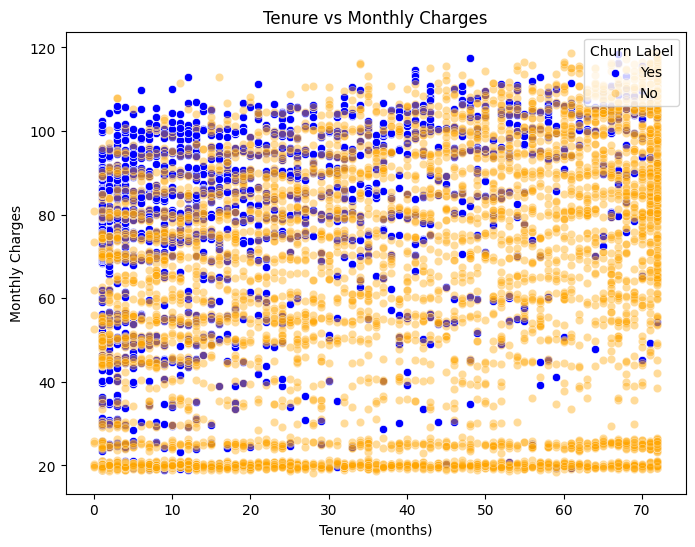

In [196]:
plt.figure(figsize=(8, 6))

# Create a scatter plot with full opacity for "Yes"
scatter = sns.scatterplot(data=df[df['Churn Label'] == 'Yes'], 
                          x='Tenure Months', 
                          y='Monthly Charges', 
                          color='blue', 
                          alpha=1.0, 
                          label='Yes')

# Overlay scatter plot for "No" with reduced opacity
sns.scatterplot(data=df[df['Churn Label'] == 'No'], 
                 x='Tenure Months', 
                 y='Monthly Charges', 
                 color='orange', 
                 alpha=0.4,  # Reduced opacity for 'No'
                 label='No')  # 'No' points

plt.title('Tenure vs Monthly Charges')
plt.xlabel('Tenure (months)')
plt.ylabel('Monthly Charges')
plt.legend(title='Churn Label', loc='upper right')
plt.show()

We can clearly see the trend that people with high monthly charges tend to have a lower tenure resulting in churning. People having Low monthly charge generally do not Churn. However it is clear that people tend churn early.
As we have already included Tenure as well as Monthly charges, we can leave Total charges.

<Axes: xlabel='Paperless Billing', ylabel='count'>

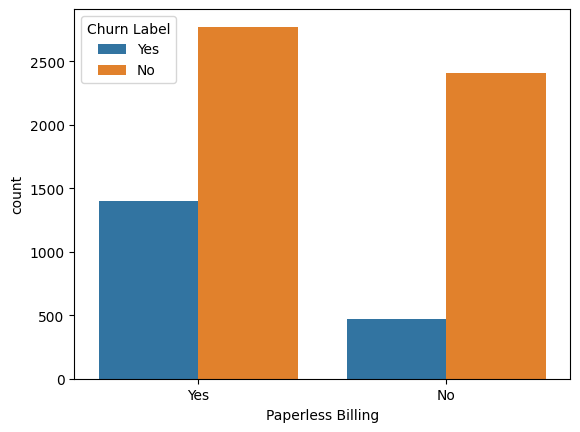

In [205]:
sns.countplot(df,x='Paperless Billing', hue='Churn Label')

<Axes: xlabel='Payment Method', ylabel='count'>

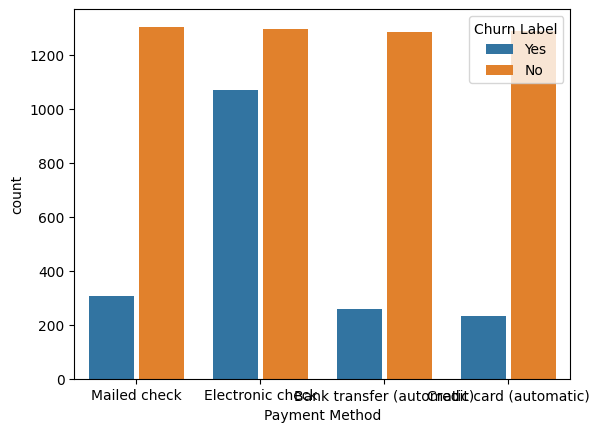

In [211]:
sns.countplot(df,x='Payment Method', hue='Churn Label', gap = 0.1)
#(Its Mailed Check, Electronic Check, Bank Transfer, Credit Card)

<Axes: xlabel='Contract', ylabel='count'>

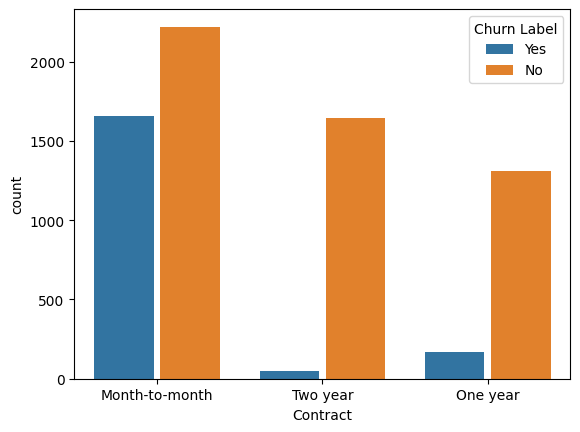

In [220]:
sns.countplot(df,x= 'Contract', hue='Churn Label', gap = 0.1)


In the above graphs we can interpret following obvservations:

1. Customers with Paperless billing tend to have higher churning rate, however not that high.
2. Customers with Electronic Check have almost 50-50 chance to churn
3. Customers who are on a Month-to-Month contract have very likely to churn whereas people with two year contract are very less likely to churn. Maybe committment is the reason here.

Lets now dive into service columns. For this also, I will use countplot 

In [227]:
print(service_features)

['Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies']


<Axes: xlabel='Phone Service', ylabel='count'>

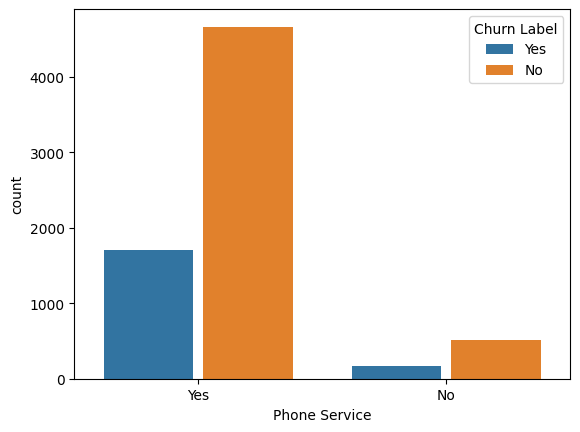

In [228]:
sns.countplot(df,x= 'Phone Service', hue='Churn Label', gap = 0.1)

<Axes: xlabel='Multiple Lines', ylabel='count'>

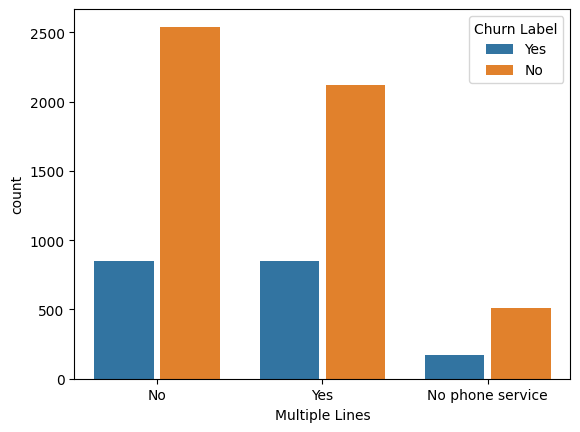

In [242]:
sns.countplot(df,x= 'Multiple Lines', hue='Churn Label', gap = 0.1)


<Axes: xlabel='Internet Service', ylabel='count'>

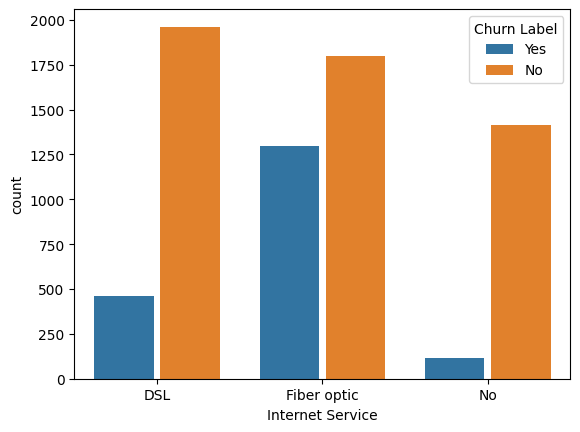

In [243]:
sns.countplot(df,x= 'Internet Service', hue='Churn Label', gap = 0.1)


<Axes: xlabel='Online Security', ylabel='count'>

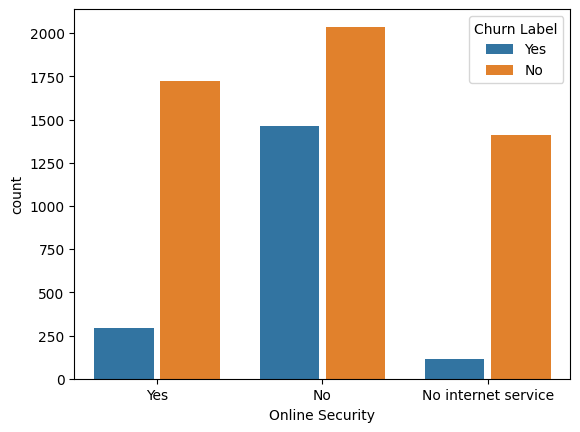

In [244]:
sns.countplot(df,x= 'Online Security', hue='Churn Label', gap = 0.1)


<Axes: xlabel='Online Backup', ylabel='count'>

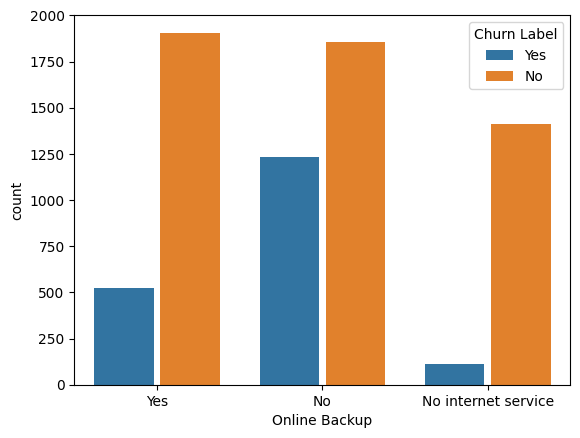

In [245]:
sns.countplot(df,x= 'Online Backup', hue='Churn Label', gap = 0.1)


<Axes: xlabel='Device Protection', ylabel='count'>

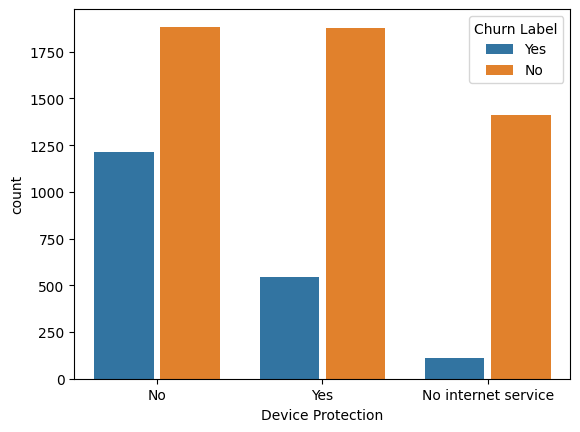

In [246]:
sns.countplot(df,x= 'Device Protection', hue='Churn Label', gap = 0.1)


<Axes: xlabel='Tech Support', ylabel='count'>

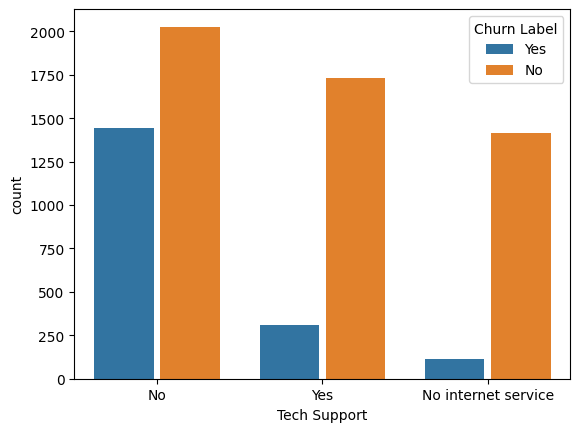

In [247]:
sns.countplot(df,x= 'Tech Support', hue='Churn Label', gap = 0.1)


<Axes: xlabel='Streaming TV', ylabel='count'>

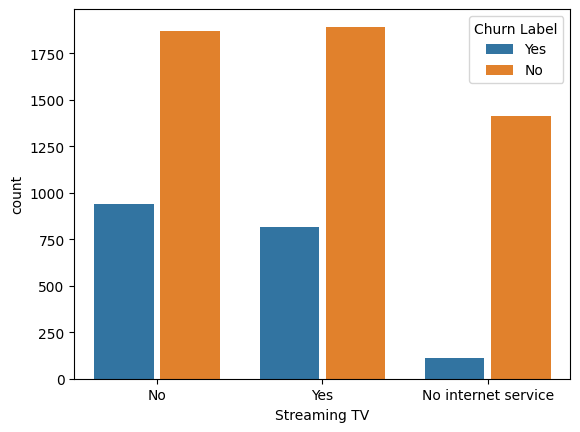

In [248]:
sns.countplot(df,x= 'Streaming TV', hue='Churn Label', gap = 0.1)


<Axes: xlabel='Streaming Movies', ylabel='count'>

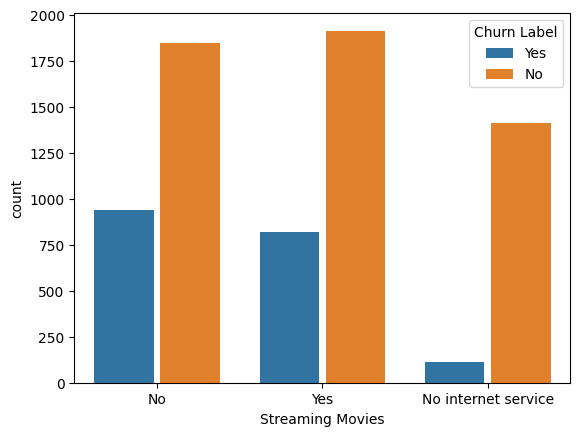

In [249]:
sns.countplot(df,x= 'Streaming Movies', hue='Churn Label', gap = 0.1)

For service data I have the following observations:

1. Customers having phone service are likely to churn irrespective of multiple lines.
2. People having not having Online Backup, Online security, Tech Support and Device protection are likely to churn which makes sense (committment).
3. People streaming Movies and TV are almost equally likely to churn which indicates this is not a important feature in deciding churn.
4. People having Internet services and using Fiber Optic generally Churn which indicates that company's internet service is poor. Almost 2/3rd people who have churned was using Optic Fiber

Now lets do the final feature category, Users Information.

<Axes: xlabel='Gender', ylabel='count'>

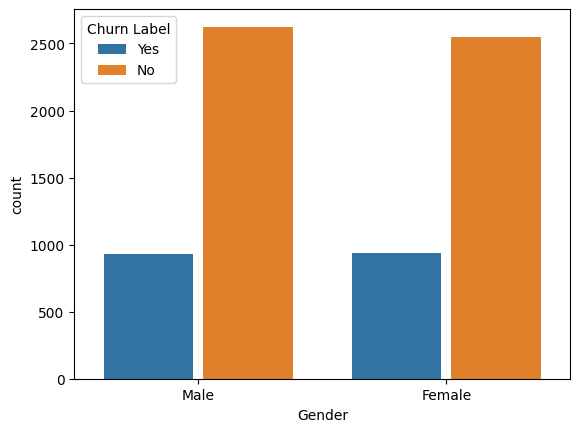

In [250]:
sns.countplot(df,x= 'Gender', hue='Churn Label', gap = 0.1)

<Axes: xlabel='Senior Citizen', ylabel='count'>

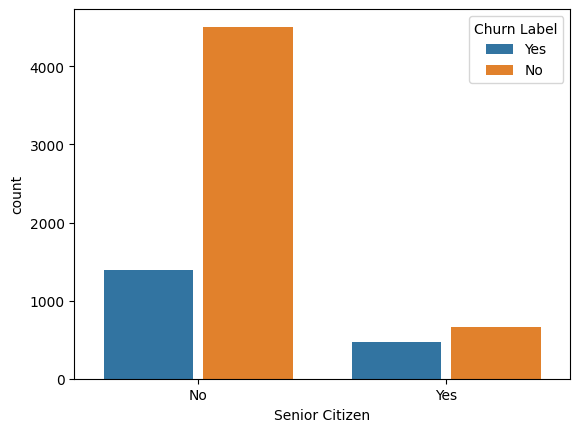

In [251]:
sns.countplot(df,x= 'Senior Citizen', hue='Churn Label', gap = 0.1)

<Axes: xlabel='Partner', ylabel='count'>

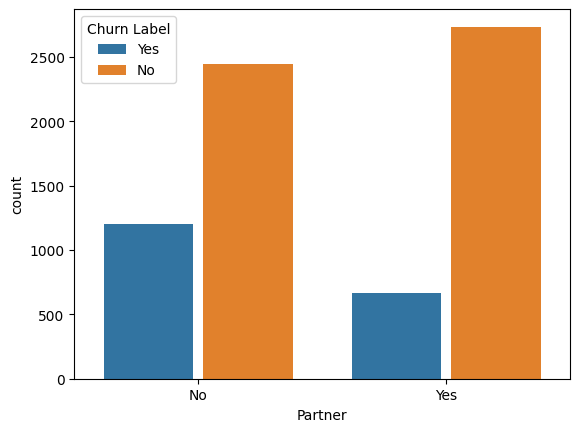

In [252]:
sns.countplot(df,x= 'Partner', hue='Churn Label', gap = 0.1)

<Axes: xlabel='Dependents', ylabel='count'>

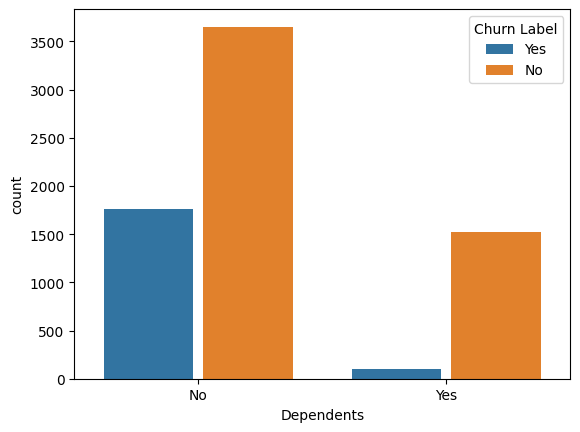

In [253]:
sns.countplot(df,x= 'Dependents', hue='Churn Label', gap = 0.1)

For user columns I obvserve following:

1. Data is unbiased towards Gender. Both are equally likely to churn or not churn.
2. Senior citizen are likely not churn
3. People having a partner are slightly more likely to churn
4. People who are dependent are likely not to churn

TODO : Correlation matrix

## Summary -

In this EDA we have dealt with Data Understanding, Data Cleaning (only for analysis), Data Anlaysis (univariate and bivariate) and Data Interpretation. At this point we understand the distribution of data and what factors make people Churn from the telecom company as well as what kind of people are likely to churn. We have went from correlation to causation and interpolationg various factors. 

Next we will be involved in Modelling.